# EDA: Visualization

In this lecture, we'll continue expanding on EDA, and focus on visualization.

We'll talk about data correlations

We'll use different types of plots to visualize data, and different libraries to do so

## Importing the libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use("bmh")

## Importing the datasets

In [3]:
auto_mpg_df = pd.read_table('./data/auto-mpg/auto-mpg.data', sep="\t")
sales_df = pd.read_csv('./data/sales/sales.csv')
datasaurus_df = pd.read_table('./data/datasaurus/datasaurus.tsv')
income_df = pd.read_csv('./data/income/income.csv')
housing_df = pd.read_csv('./data/housing/housing.csv')

Making sure we imported the data correctly

In [6]:
display(auto_mpg_df.sample())
display(sales_df.sample())
display(datasaurus_df.sample())
display(income_df.sample())
display(housing_df.sample())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
114,12.0,8.0,350.0,180.0,4499.0,12.5,73.0,1.0,oldsmobile vista cruiser


,Order ID,Product,Quantity,Price,Customer Name,Address,State,Date
6,1007,Product D,2,35.99,Customer 3,789 Oak St,OH,2022-01-07


,dataset,x,y
71,dino,53.8462,80.641


,Education,Seniority,Income
23,10.413793,32.413793,18.570665


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10492,-117.68,33.49,18.0,4173.0,625.0,1649.0,634.0,6.3568,294300.0,<1H OCEAN


## Visualizing the data and the relationships between the variables
### Histograms
Histograms are used to visualize the distribution of a variable.

Ex1: For a single variable

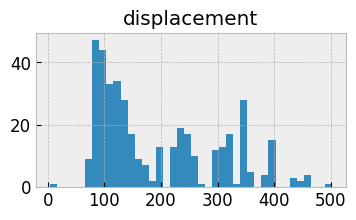

In [11]:
auto_mpg_df.hist(bins=40, column=['displacement'], figsize=(4,2))
plt.show()

Ex2: For multiple variables

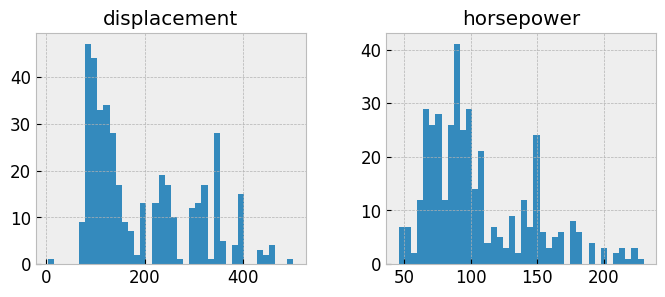

In [16]:
auto_mpg_df[['displacement', 'horsepower']].hist(bins=40, figsize=(8,3))
plt.show()

Ex3: For all variables

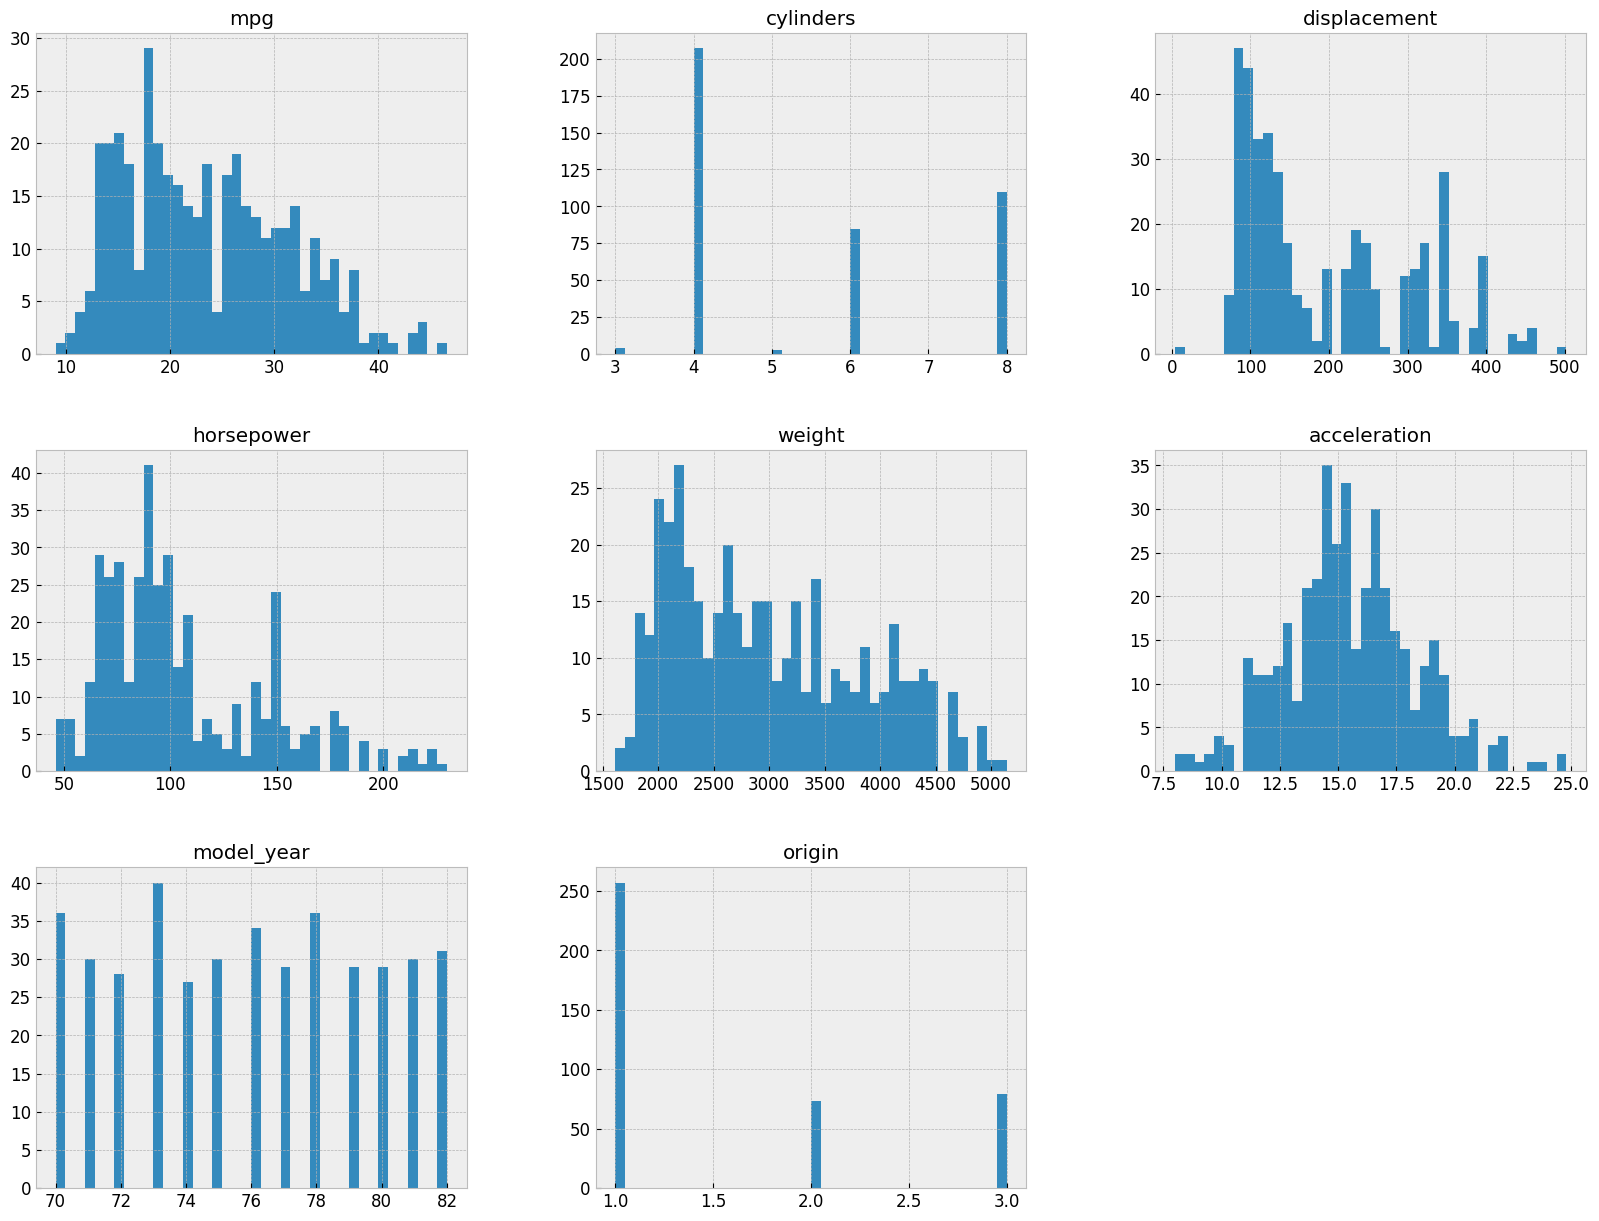

In [17]:
auto_mpg_df.hist(bins=40, figsize=(20,15))
plt.show()

using seaborn

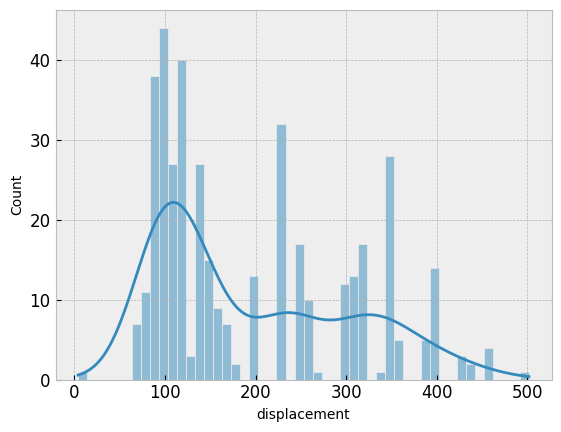

In [25]:
sns.histplot(data=auto_mpg_df['displacement'], bins=50, kde=True, stat="count")
plt.show()

### Scatter plots
Scatter plots are used to visualize the relationship between two variables.

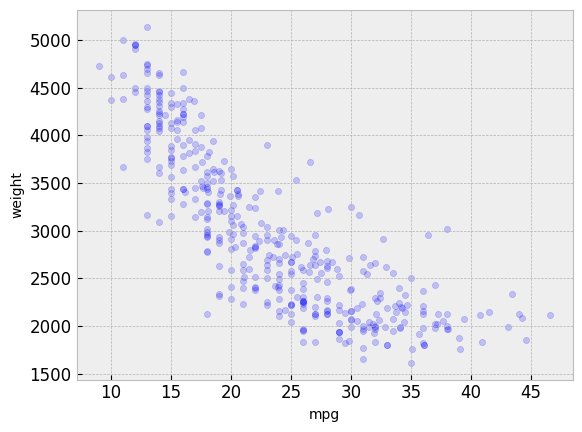

In [27]:
auto_mpg_df.plot(kind="scatter", x="mpg", y="weight", alpha=0.2)
plt.show()

<Axes: xlabel='mpg', ylabel='weight'>

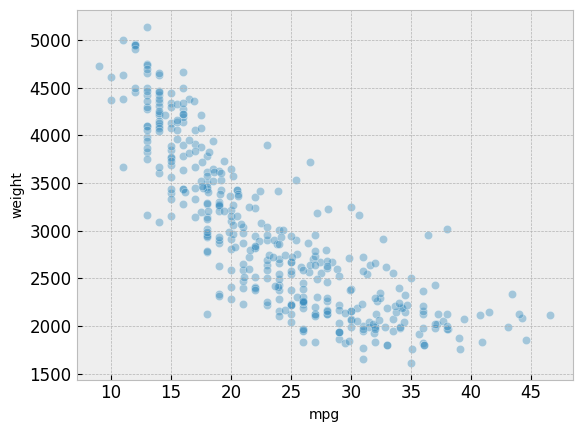

In [30]:
sns.scatterplot(data=auto_mpg_df, x="mpg", y="weight",alpha=0.4)

<Axes: xlabel='horsepower', ylabel='weight'>

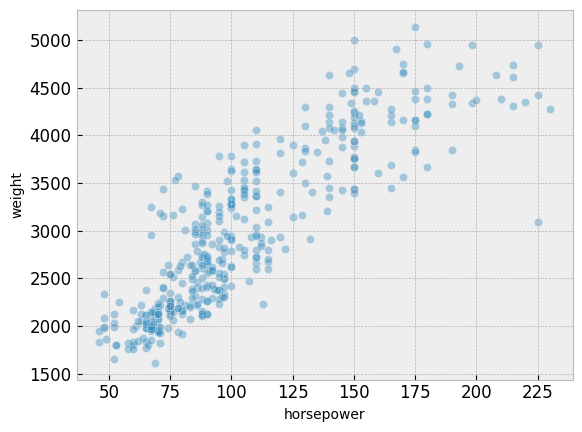

In [31]:
sns.scatterplot(data=auto_mpg_df, x="horsepower", y="weight",alpha=0.4)

What does this correlation imply? 

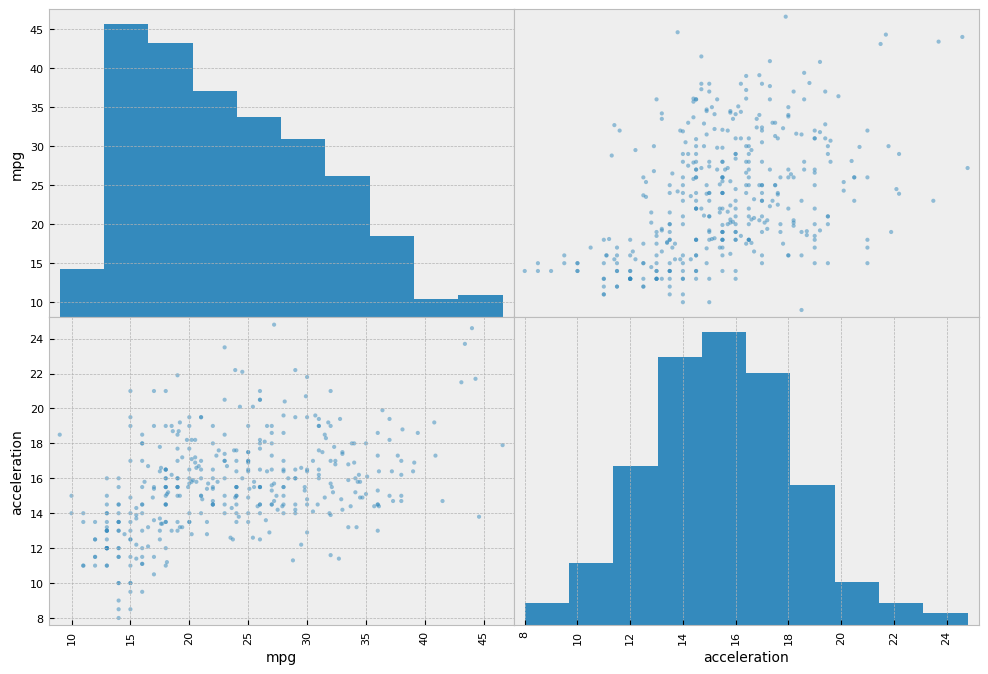

In [36]:
from pandas.plotting import scatter_matrix

attributes = ["mpg", "acceleration"]

scatter_matrix(auto_mpg_df[attributes], figsize=(12,8))
plt.show()

what does the cylinder charts mean?

> Show the same chart on a different dataset (using seaborn)

### Correlations and Heatmaps
Correlation mean the relationship between two variables. Correlation can be positive (increase in one variable results in increase in the other variable) or negative (increase in one variable results in decrease in the other variable).

A correlation matrix is a table showing correlation coefficients between variables.

In [35]:
auto_mpg_corr = auto_mpg_df.corr()
auto_mpg_corr

C:\Users\gilanyym\AppData\Local\Temp\ipykernel_14092\524157089.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  auto_mpg_corr = auto_mpg_df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.775908,-0.784815,-0.777774,-0.832052,0.422095,0.578596,0.564706
cylinders,-0.775908,1.000000,0.931733,0.845694,0.896315,-0.528078,-0.362513,-0.569007
displacement,-0.784815,0.931733,1.000000,0.871745,0.909072,-0.564708,-0.375414,-0.605413
horsepower,-0.777774,0.845694,0.871745,1.000000,0.867642,-0.701634,-0.423652,-0.461542
weight,-0.832052,0.896315,0.909072,0.867642,1.000000,-0.436600,-0.317588,-0.585608
acceleration,0.422095,-0.528078,-0.564708,-0.701634,-0.436600,1.000000,0.304091,0.222774
model_year,0.578596,-0.362513,-0.375414,-0.423652,-0.317588,0.304091,1.000000,0.190845
origin,0.564706,-0.569007,-0.605413,-0.461542,-0.585608,0.222774,0.190845,1.000000


### Heatmaps

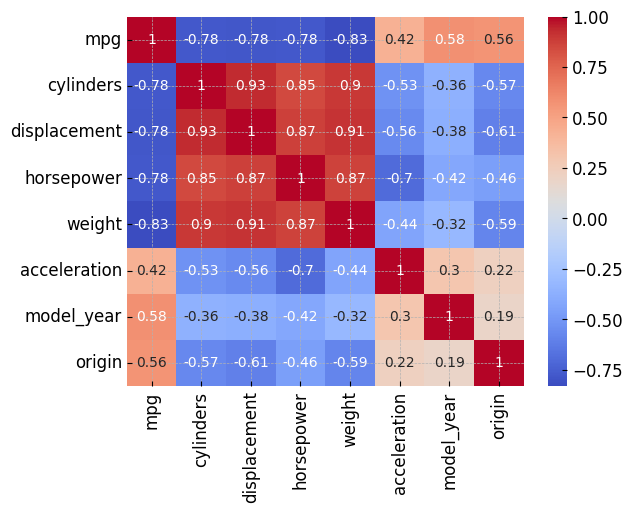

In [39]:
sns.heatmap(auto_mpg_corr, annot=True, cmap="coolwarm")
plt.show()

Using a simpler dataset, and using SeaBorn

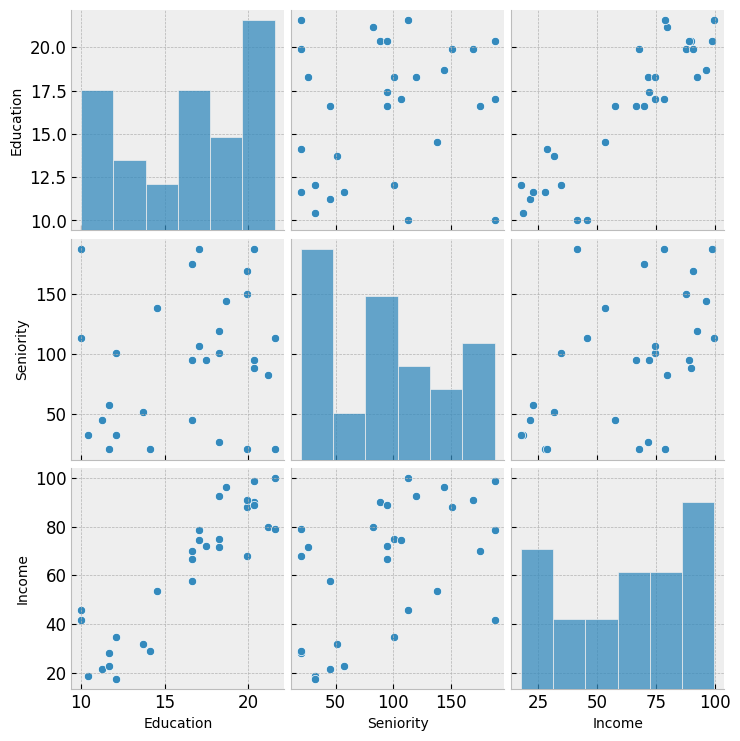

In [40]:
sns.pairplot(income_df)
plt.show()

In [41]:
income_corr = income_df.corr()
income_corr

,Education,Seniority,Income
Education,1.000000,0.194515,0.901003
Seniority,0.194515,1.000000,0.518288
Income,0.901003,0.518288,1.000000


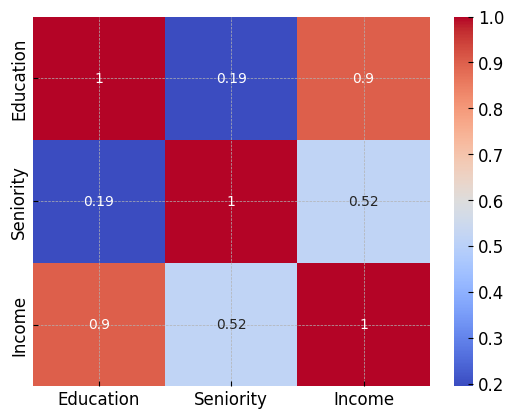

In [42]:
sns.heatmap(income_corr, annot=True, cmap="coolwarm")
plt.show()

Should that mean we can get rid of the seniority column?

### 3D scatter plot

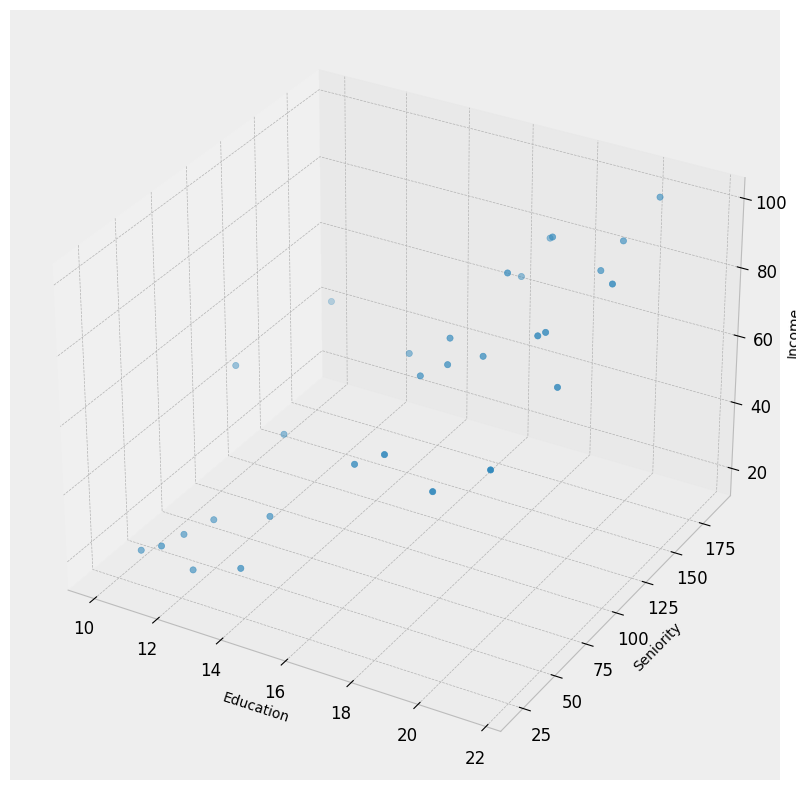

In [43]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection="3d")

ax.scatter(income_df['Education'], income_df['Seniority'], income_df['Income'])

ax.set_xlabel('Education')
ax.set_ylabel('Seniority')
ax.set_zlabel('Income')

plt.show()

In [44]:
fig = px.scatter_3d(income_df, x='Education', y='Seniority', z='Income')
fig.show()